# Project structure:
    0. Imports and preparing the table
    1. Replacing 'Rating not found to the null values'
    2. Using indexing getting null value
    3. Getting unique values from this table
    4. Most common data
    5. Average movies rating
    6. Number of movies sorting by genre & country
    7. Maximal KinoPoisk Rating
    8. Minimal KinoPoisk Rating
    9. Average rating per country
    10. Filtration using conditions
    11. Filling null values using average KinoPoisk Rating
    12. Getting outliers from KinoPoisk Rating
    13. Descriptive statistics
    14. Sorting the table by countries
    15. Visualisation
    16. Report

# Visualisation:
    1. Distribution of KinoPoisk ratings
    2. Country Distribution
    3. Number of movies by genres
    4. Top 5 Anime Movies Based on Kinopoisk Rating
    5. Kazakhstan movies
    


## Importing:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prepared table display:

In [3]:
excel_file_path = r'C:\Users\user\Desktop\python final\kinopoisk.xlsx'
df = pd.read_excel(excel_file_path, index_col=None)
df = df.reset_index(drop=True)
df.head(500)

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
0,1,Слово пацана. Кровь на асфальте,"2023–..., 50 мин.",Russia,drama,Жора Крыжовников,9
1,2,Цикады,"2023, 50 мин.",Russia,drama,Евгений Стычкин,7.6
2,3,Кибердеревня,"2023, 25 мин.",Russia,fantastic,Сергей Васильев,8.2
3,4,Волшебный участок,"2023, 50 мин.",Russia,action,Степан Гордеев,8.1
4,5,Жизнь по вызову,"2022–..., 34 мин.",Russia,drama,Сарик Андреасян,6.8
...,...,...,...,...,...,...,...
495,496,Пробуждение,2021,Russia,drama,Эдуард Парри,8.2
496,497,Невероятные приключения ДжоДжо,"2012-2022, 24 мин.",Japan,anime,Кэнъити Судзуки,8.6
497,498,Допрос,"2020, 46 мин.",USA,drama,Эрнест Р.Дикерсон,7.5
498,499,"Лучше, чем люди","2018-2019, 53 мин.",Russia,drama,Андрей Джунковский,7.7


### 1. Replace method - replacing 'Rating not found' to the null values for the better analysis

In [4]:
df.replace("Rating not found", np.nan, inplace=True)

### 2. Integer location method - to display 19 string with null Kinopoisk rating

In [5]:
kinopoisk_rating_column = df.iloc[:,6] # getting kinopoisk rating column
print(kinopoisk_rating_column.iloc[18]) # getting 19 string in our table

nan


### 3. Unique values - nunique() method 

In [6]:
unique_countries_count = df['Country'].nunique()
unique_genres_count = df['Genre'].nunique()
unique_producers_count = df['Producer'].nunique()

print(f'Number of countries produced movies: {unique_countries_count}')
print(f'Number of movie genres in kinopoisk: {unique_genres_count}')
print(f'Number of movie producers: {unique_producers_count}')

Number of countries produced movies: 20
Number of movie genres in kinopoisk: 19
Number of movie producers: 431


### 4. Most common data - value counts() method and idxmax()

In [7]:
most_freq_country = df['Country'].value_counts().idxmax()
most_freq_genres = df['Genre'].value_counts().idxmax()
most_freq_producers = df['Producer'].value_counts().idxmax()

print("Country produced the most of the movies: ", most_freq_country)
print("The most popular genre in kinopoisk website: ", most_freq_genres)
print("Producer who has produced more movies: ", most_freq_producers)


Country produced the most of the movies:  Russia
The most popular genre in kinopoisk website:  drama
Producer who has produced more movies:  Карен Оганесян


### 5. Average kinopoisk rating - mean() 

In [8]:
average_rating = df['Kinopoisk rating'].mean()
print(f"Average rating: {average_rating:.1f}")

Average rating: 7.7


### 6. Number of movies sorting by genre & country - value counts()

In [9]:
genre_counts = df['Genre'].value_counts()
print(genre_counts)
print('------------------')
country_counts = df['Country'].value_counts()
print(country_counts)

Genre
drama          132
comedy          79
triller         56
fantastic       45
detective       43
cartoon         33
fantasy         22
romance         21
anime           21
action          18
crime           11
war              5
biography        4
history          3
documentary      3
family           1
game             1
adventures       1
musical          1
Name: count, dtype: int64
------------------
Country
Russia         228
USA            159
UK              29
Japan           21
Turkey          11
South Korea      9
Kazakhstan       8
China            7
Australia        5
Spain            4
Germany          3
USSR             3
Ukraine          3
Canada           2
Sweden           2
France           2
U                1
Ireland          1
Norway           1
Italy            1
Name: count, dtype: int64


### 7. Movie with the maximal Kinopoisk rating

In [10]:
max_rating_movie = df.loc[df['Kinopoisk rating'].idxmax()]
max_rating_movie

№                                           117
Title                                    Друзья
Year and average duration    1994-2004, 22 мин.
Country                                     USA
Genre                                    comedy
Producer                         Гари Хэлворсон
Kinopoisk rating                            9.2
Name: 116, dtype: object

### 8. Movie with the minimal Kinopoisk rating

In [11]:
max_rating_movie = df.loc[df['Kinopoisk rating'].idxmin()]
max_rating_movie

№                                           305
Title                          Счастливы вместе
Year and average duration    2006-2013, 25 мин.
Country                                  Russia
Genre                                   romance
Producer                         Георгий Дронов
Kinopoisk rating                            4.8
Name: 304, dtype: object

### 9. Average rating per country - groupby () to group country & rating

In [12]:
country_avg_rating = df.groupby('Country')['Kinopoisk rating'].mean()
country_avg_rating

Country
Australia      8.150000
Canada         7.600000
China          8.585714
France         7.700000
Germany        7.700000
Ireland        8.200000
Italy          8.200000
Japan          8.265000
Kazakhstan     7.871429
Norway         7.600000
Russia         7.458095
South Korea    7.937500
Spain          7.933333
Sweden         8.300000
Turkey         8.040000
U              8.700000
UK             7.935714
USA            7.937013
USSR           8.633333
Ukraine        7.400000
Name: Kinopoisk rating, dtype: float64

### 10. Filtration data using conditional statements 

In [13]:
filtered_df = df[(df['Country'] == 'Australia') & (df['Kinopoisk rating'] > 8)]
filtered_df

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
289,290,Удивительный цифровой цирк,2023-…,Australia,cartoon,Gooseworx,8.6


### 11. Filling empty data using average rating - fillna()

In [14]:
df['Kinopoisk rating'].fillna(df['Kinopoisk rating'].mean(), inplace=True)
df.head(19)

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
0,1,Слово пацана. Кровь на асфальте,"2023–..., 50 мин.",Russia,drama,Жора Крыжовников,9.000000
1,2,Цикады,"2023, 50 мин.",Russia,drama,Евгений Стычкин,7.600000
2,3,Кибердеревня,"2023, 25 мин.",Russia,fantastic,Сергей Васильев,8.200000
3,4,Волшебный участок,"2023, 50 мин.",Russia,action,Степан Гордеев,8.100000
4,5,Жизнь по вызову,"2022–..., 34 мин.",Russia,drama,Сарик Андреасян,6.800000
5,6,Фишер,"2023, 60 мин.",Russia,detective,Саргей Тарамаев,7.800000
6,7,Пищеблок,"2021–..., 50 мин.",Russia,triller,Святослав Подгаевский,7.400000
7,8,Кухня,"2012–2016, 25 мин.",Russia,comedy,Дмитрий Дьяченко,8.200000
8,9,Атака титанов,"2013–2023, 24 мин.",Japan,anime,Тэцуро Араки,8.700000
9,10,Мой маленький пони: Дружба — это чудо,"2010–2019, 22 мин.",USA,cartoon,Джим Миллер,8.100000


### 12. Outliers - statistical formulaes 

In [15]:
numeric_column = 'Kinopoisk rating' 

Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[numeric_column] < lower_bound) | (df[numeric_column] > upper_bound)]
outliers

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
125,126,Цербер,"2023, 45 мин.",Russia,detective,Владимир Щегольк,5.8
132,133,Соседка,2023,Russia,comedy,Байбулат Батуллин,6.2
143,144,Лэйт Найт Скул,"2022-…, 25 мин.",Russia,drama,Ника Яковлева,6.2
198,199,Папины дочки.,"2007-2013, 23 мин.",Russia,comedy,Ирина Васильева,5.9
206,207,Новенький,"2020-2021, 49 мин.",Russia,drama,Оксана Барковская,6.1
242,243,"Здравствуйте, вам пора","2022-…, 25 мин.",Russia,comedy,Леонид Марголин,6.2
304,305,Счастливы вместе,"2006-2013, 25 мин.",Russia,romance,Георгий Дронов,4.8
309,310,Властелин колец: Кольца власти,"2022, 70 мин.",USA,fantasy,Уэйн Йип,6.2
326,327,Школа,"2010, 30 мин.",Russia,drama,Валерия Гай Германика,4.9
345,346,Закрытая школа,"2011-2012, 48 мин.",Russia,triller,Олег Асадулин,6.1


### 13. Descriptive statistics - describe ()

In [16]:
df.describe(include='all')

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
count,500.000000,500,497.0,500,500,499,500.000000
unique,NaN,498,360.0,20,19,431,NaN
top,NaN,Задача трёх тел,2023.0,Russia,drama,Карен Оганесян,NaN
freq,NaN,2,21.0,228,132,5,NaN
mean,250.500000,NaN,NaN,NaN,NaN,NaN,7.748504
std,144.481833,NaN,NaN,NaN,NaN,NaN,0.644957
min,1.000000,NaN,NaN,NaN,NaN,NaN,4.800000
25%,125.750000,NaN,NaN,NaN,NaN,NaN,7.400000
50%,250.500000,NaN,NaN,NaN,NaN,NaN,7.800000
75%,375.250000,NaN,NaN,NaN,NaN,NaN,8.200000


#### 500 movies and 498 from them are unique, since 'Задача трёх тел' appears two times
#### 497 datas about year and avg duration, 360 from them are unique, most of the movies are produced this year (21 times)
#### 500 movies was produced in 20 different countries and more than half of them in Russia (228 movies)
#### 500 filled genres, 19 from them are unique, the most popular is 'drama' (132 drama movies)
#### 499 producers, 431 are unique, 'Карен Оганесян' appears more ofter than others (5 movies under his production)
#### 468 movies has the rating, AVG rating - 7.75; Min rating - 4.8 (Счастливы вместе) ; Max rating - 9.2 (Друзья)


### 14. Sorting table by countries


In [17]:
df.sort_values(by='Country', ascending=True, inplace=True)
df.head(100)

,№,Title,Year and average duration,Country,Genre,Producer,Kinopoisk rating
341,342,Далёкие холмы,"2023, 225 мин.",Australia,drama,Баз Лурман,7.748504
324,325,Решала,"2018-2021, 25 мин.",Australia,drama,Нэш Эдгертон,7.700000
289,290,Удивительный цифровой цирк,2023-…,Australia,cartoon,Gooseworx,8.600000
117,118,Ловский плут,"2023-…, 60 мин.",Australia,drama,Джеффри Уокер,7.748504
435,436,Мальчик поглощает Вселенную,2024,Australia,drama,Бхарат Наллури,7.748504
...,...,...,...,...,...,...,...
246,247,Манюня,"2021-…, 24 мин.",Russia,family,Арман Марутян,7.100000
244,245,Цифровой код,"2023-…, 45 мин.",Russia,triller,Александр Люман-Мосийченко,7.748504
242,243,"Здравствуйте, вам пора","2022-…, 25 мин.",Russia,comedy,Леонид Марголин,6.200000
241,242,Капельник,"2022, 50 мин.",Russia,drama,Илья Аксенов,7.900000


# Visualization

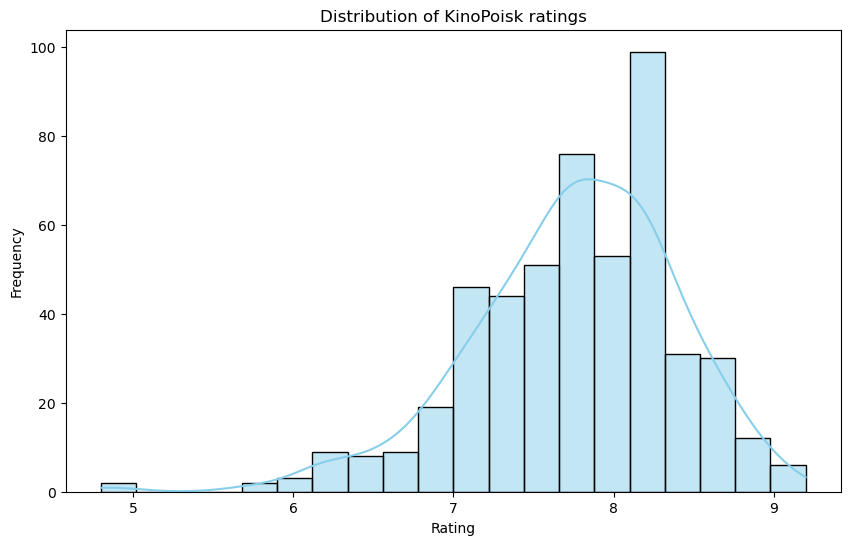

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Kinopoisk rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of KinoPoisk ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

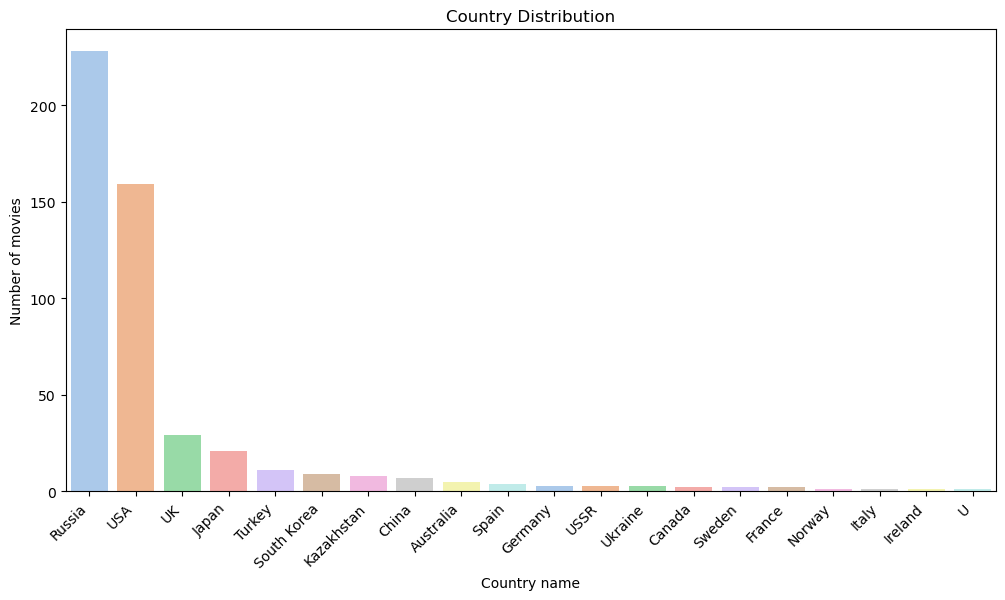

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='pastel')
plt.title('Country Distribution')
plt.xlabel('Country name')
plt.ylabel('Number of movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

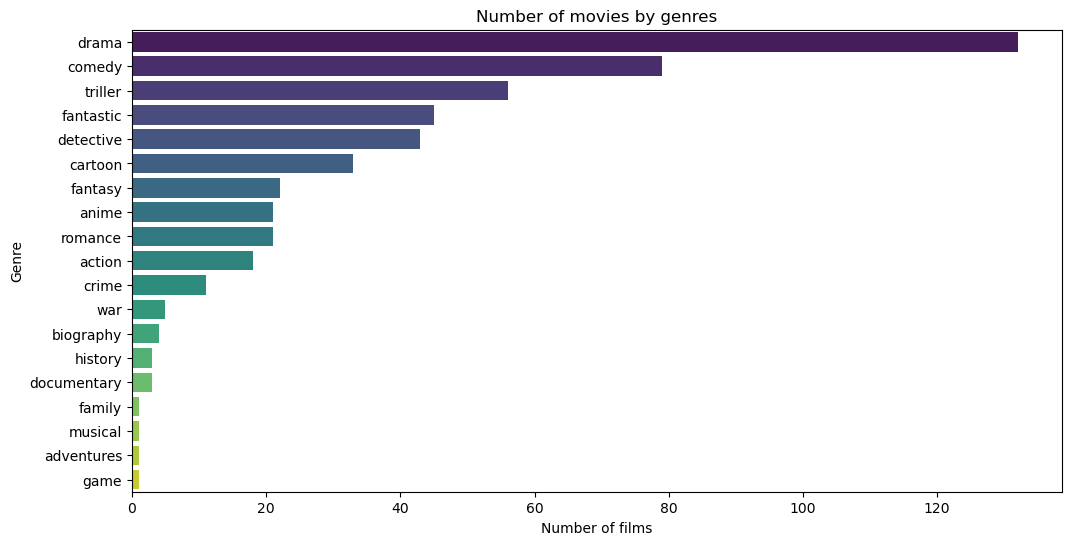

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of movies by genres')
plt.xlabel('Number of films')
plt.ylabel('Genre')
plt.show()

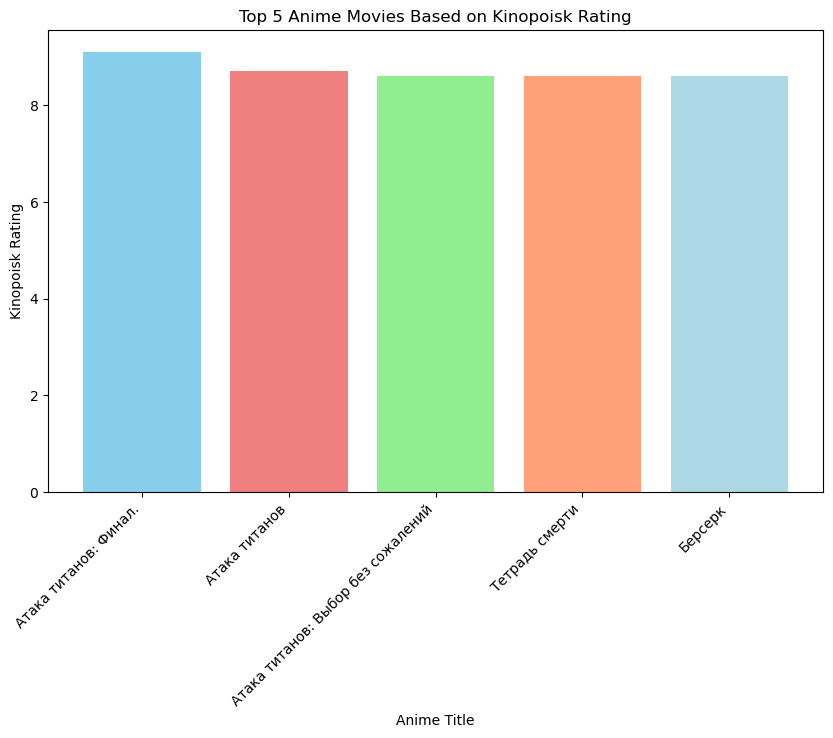

In [21]:
anime_movies = df[df['Genre'] == 'anime']
top_five_anime_movies = anime_movies.nlargest(5, 'Kinopoisk rating')[['Title', 'Kinopoisk rating']]
bar_colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(10, 6))
plt.bar(top_five_anime_movies['Title'], top_five_anime_movies['Kinopoisk rating'], color=bar_colors)
plt.title('Top 5 Anime Movies Based on Kinopoisk Rating')
plt.xlabel('Anime Title')
plt.ylabel('Kinopoisk Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


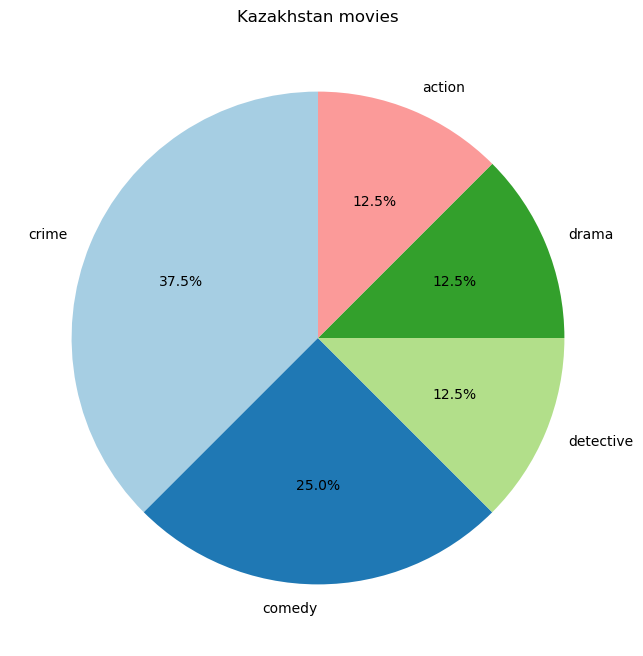

In [22]:
kazakhstan_movies = df[df['Country'] == 'Kazakhstan']

plt.figure(figsize=(8, 8))
kazakhstan_movies['Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Kazakhstan movies')
plt.ylabel('')
plt.show()


# Total Report on the Project

   #### Web Scraping Attempt
    
    Initially attempted to scrape the first 500 movies from Kinopoisk using Selenium & BeautifulSoup.After collecting data 
    about the first 100 movies, we encountered captcha issues. Later, due to limitations and insufficient columns in the 
    scraped data, the decision was made to manually compile the data.

   #### Libraries Used:
    selenium & beautifulSoup: For the data scraping.
    numpy: For efficient array operations.
    pandas: For data manipulation and analysis.
    matplotlib.pyplot and seaborn: For data visualization.

   #### Project Overview.
    The project involved data analysis and visualization of a movie dataset. Various statistical methods and visualizations were applied to understand the distribution, trends, and characteristics of the data. Challenges in web scraping were addressed, and alternative methods were employed to compile the dataset. The project provided insights into movie ratings, genres, and production details, contributing to a comprehensive analysis of the provided movie dataset.





